In [1]:
from aip import AipOcr
import cv2
import matplotlib.pyplot as plt
from glob import glob
import time

import os

In [11]:
# APP_ID = '11169082'
# API_KEY = 'xUzn3kBiiAEyMzBPscDoSF08'
# SECRET_KEY = 'heSAxjrFo1TEGpQcNHGi3kO5zWfOhg4O'

APP_ID = '11675311'
API_KEY = 'Hm60WLQ8OWieNsxy6F4UkTWQ'
SECRET_KEY = 'MkAGdb4ZPyKhvIe9YwelvxLU5BqypInf'

client = AipOcr(APP_ID, API_KEY, SECRET_KEY)

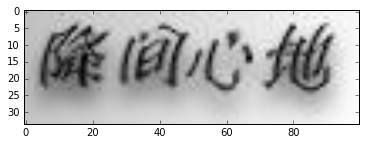

{'log_id': 8447277833062624644, 'words_result_num': 1, 'words_result': [{'words': '廉间心地', 'probability': {'variance': 0.014577, 'average': 0.815529, 'min': 0.651957}}]}
{'log_id': 1561603708702273321, 'words_result_num': 1, 'words_result': [{'words': '降间心地', 'probability': {'variance': 0.000529, 'average': 0.982318, 'min': 0.942859}}]}


In [32]:
url = 'http://www.tianjin-air.com/captcha/sphinx?timestamp=95'


from PIL import Image
import requests
from io import BytesIO
import io

response = requests.get(url)
img = Image.open(BytesIO(response.content))


imgByteArr = io.BytesIO()
img.save(imgByteArr, format='PNG')
imgByteArr = imgByteArr.getvalue()


plt.imshow(img)
plt.show()

img.save('out.png')


""" 调用通用文字识别, 图片参数为本地图片 """
options={}
options["language_type"] = "CHN"
options["probability"] = "true"
#result = client.basicAccurate(imgByteArr);
#basicGeneral
result1 = client.basicGeneral(imgByteArr,options);
print(result1)
result2 = client.basicAccurate(imgByteArr,options);
print(result2)

In [13]:
result

{'log_id': 7056047850981297799,
 'words_result': [{'words': '他张伴御'}],
 'words_result_num': 1}

In [7]:
PATH = 'I:/AI-car/car_ims/car_ims/car_ims/*'

In [8]:
def get_file(path):
    with open(path, 'rb') as fp:
        return fp.read()

In [9]:
len(glob(PATH))

16185

In [10]:
for i, pth in enumerate(glob(PATH)):
    try:
        directory = pth.split('/')[0] + '/' +pth.split('/')[1]+'/' +pth.split('/')[2]+'/' +pth.split('/')[3]+'/' +'CarLabels2'+'/'
        #print(directory)

        fileext = pth.split('/')[-1].split('.')[-1]
        showimage = cv2.imread(pth)
        show = cv2.cvtColor(showimage, cv2.COLOR_BGR2RGB)
    #     plt.imshow(show)
    #     plt.show()
        options = {}
        options['top_num'] = 1
        image = get_file(pth)
        result = client.carDetect(image, options)
        finalfile = directory + result['result'][0]['name'] + '_'+ str(i) + '.' + fileext
        cv2.imwrite(finalfile,showimage)
        #print(result.name + str(i))
        os.remove(pth)
        time.sleep(0.1)
        
        if(i%50 ==0 ):
            print(str(i), 'Done...')
    except Exception as e:
        print('Error------>' , str(i),'------>', str(pth),'------>', str(e))
        continue
    break
print('All Done...................')

0 Done...
All Done...................


In [11]:
showimage = cv2.imread(PATH)
show = cv2.cvtColor(showimage, cv2.COLOR_BGR2RGB)
plt.imshow(show)
plt.show()

options = {}
options['top_num'] = 1
image = get_file(PATH)
client.carDetect(image, options)


error: C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


In [19]:
r = {'log_id': 5568929693257822564, 'location_result': {'width': 630, 'top': 151, 'height': 380, 'left': 168}, 'result': [{'score': 0.99917483329773, 'name': '标致307', 'year': '2008-2013'}], 'color_result': '颜色无法识别'}

'标致307'